In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns # contains barplot
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LassoCV # lasso linear model with cross-validation
from sklearn.ensemble import RandomForestRegressor # random forest
from sklearn.ensemble import GradientBoostingRegressor # gradient boosting
from sklearn.neural_network import MLPRegressor # multiplayer perceptron

# Reading the data

In [2]:
# reading the data
df = pd.read_csv("arctic_data.csv")
#df.head()

In [3]:
#df.describe()

# Check if have missing data

In [4]:
# missing data?
#df.isna().head()

In [5]:
#df.isna().mean()
# missing data? No.

# Variables - x

In [6]:
arctic = df[['Rainfall', 'Daylight', 'Population', \
                'CO2', 'Ozone', 'OceanTemperature_NorthernHemisphere', \
                'LandTemperature_NorthernHemisphere', 'MinTemperature_NorthSlopeAlaska', \
                'GDP_WORLD']]
arctic.describe()

,Rainfall,Daylight,Population,CO2,Ozone,OceanTemperature_NorthernHemisphere,LandTemperature_NorthernHemisphere,MinTemperature_NorthSlopeAlaska,GDP_WORLD
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.346327,0.493069,0.502713,0.443966,0.393414,0.458664,0.466685,0.546334,0.408513
std,0.311400,0.324229,0.289257,0.270967,0.245841,0.214461,0.148151,0.277091,0.321781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.264000,0.258950,0.218150,0.170292,0.289100,0.359025,0.283000,0.137838
50%,0.225000,0.517000,0.504600,0.413865,0.368090,0.429700,0.461200,0.497650,0.295927
75%,0.587500,0.816500,0.750050,0.666030,0.598325,0.601600,0.566400,0.831000,0.695840
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Target - y

In [7]:
vol = df[['ArcticIceVolume']]
vol.describe()

,ArcticIceVolume
count,490.000000
mean,0.539257
std,0.250732
min,0.000000
25%,0.353139
50%,0.552475
75%,0.743685
max,1.000000


# Split dataset to 1:9 for testing and training

In [8]:
# split traing set and testing set to 9:1 (441:49):
X_train, X_val, y_train, y_val = train_test_split(arctic, vol, test_size=0.1, \
                                                                    train_size=0.9, random_state=7)
X_train.shape, X_val.shape

((441, 9), (49, 9))

# For saving results (R2, Explained Variance, MSE, MAE)

In [9]:
experiments = []
metric_names = []
metric_vals = []

# Tracking experiment results

In [10]:
# tracking experiment results
def plot_preds(y_pred, y_val):
    '''Plot predictions vs labels on a scatter plot.'''
    lines_color = plt.rcParams['text.color']
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    plt.plot([0, 1], [0, 1], c='red', zorder=1)
    plt.scatter(y_val, y_pred, alpha=0.6, edgecolors=lines_color, c='#5EC2FF')
    #ax.set_aspect('equal', adjustable='box')
    ax.grid(linestyle='--')
    plt.xlabel('True value')
    plt.ylabel('Predictions')
    plt.show()

def calc_metrics(y_pred, y_val):
    '''Print 4 metrics using predictions and labels.'''
    r2 = r2_score(y_val, y_pred)
    ev = explained_variance_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    return r2, ev, mse, mae

# Lasso multiple linear regression (MLR) model with cross validation (CV)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Model: LassoCV(cv=10, n_alphas=1000, random_state=0)
Predictions: (49,)


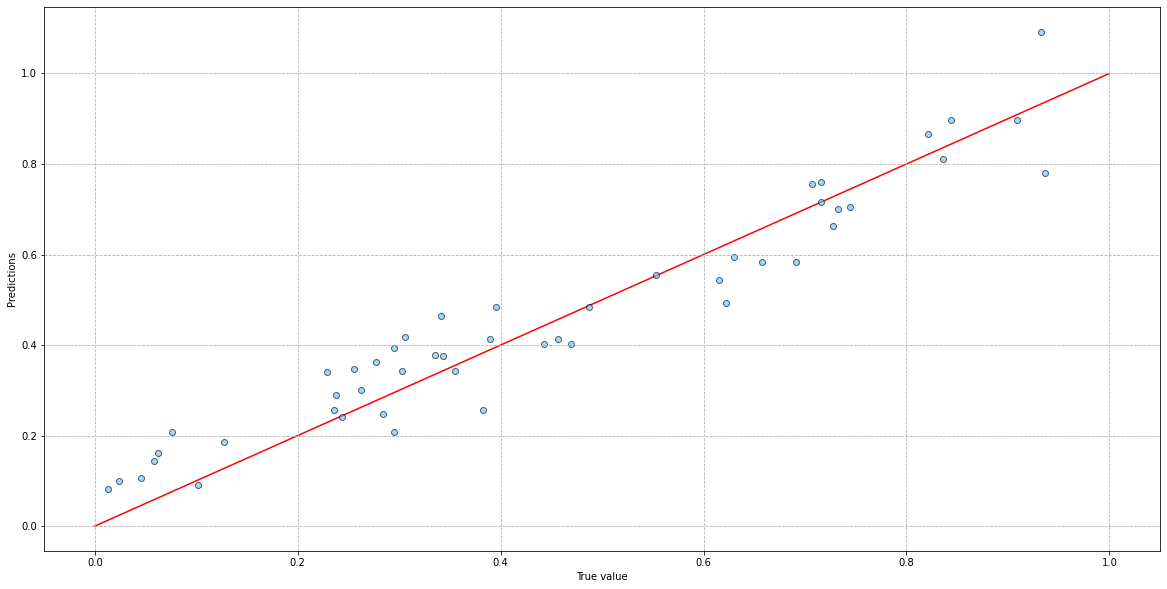

R2 Score: 0.920029780
Explained Variance Score: 0.923010553
MSE: 0.005608590
MAE: 0.062583473
4.527606686451934e-05


In [11]:
lassoMLR_cv_model = LassoCV(
    cv=10, random_state=0, n_alphas=1000
).fit(X_train, y_train)
y_pred = lassoMLR_cv_model.predict(X_val)
print(f'Model: {lassoMLR_cv_model}')
print(f'Predictions: {y_pred.shape}')

# plot
plot_preds(y_pred, y_val)
r2, ev, mse, mae = calc_metrics(y_pred, y_val)
print(f'R2 Score: {r2:.9f}')
print(f'Explained Variance Score: {ev:.9f}')
print(f'MSE: {mse:.9f}')
print(f'MAE: {mae:.9f}')
# Update overall results, if we haven't already:
if 'LassoLinearModel' not in experiments:
    experiments.extend(['LassoLinearModel']*4)
    metric_names.extend(['R2', 'Explained Variance', 'MSE', 'MAE'])
    metric_vals.extend([r2, ev, mse, mae])


print(lassoMLR_cv_model.alpha_)

# Polynomial Lasso MLR model with CV

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Model: LassoCV(cv=10, n_alphas=1000, random_state=0)
Predictions: (49,)


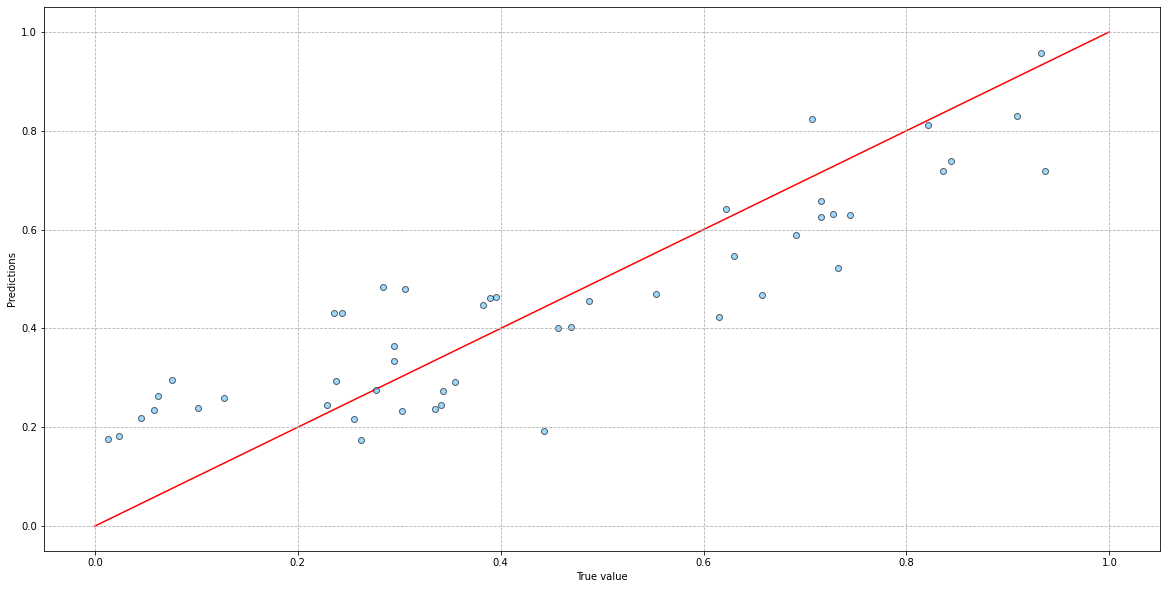

R2 Score: 0.770269522
Explained Variance Score: 0.770271834
MSE: 0.016111799
MAE: 0.109231382
0.0006309759944345524


In [12]:
poly_df = pd.read_csv("poly.csv")
poly_arctic = poly_df[['Rainfall', 'Rainfall^2', 'Rainfall^3', 'Rainfall^4', \
                        'Daylight', 'Daylight^2', 'Daylight^3', 'Daylight^4', 
                        'Ozone', 'Ozone^2', 'Ozone^3', 'Ozone^4', 
                        'MinTemp', 'MinTemp^2', 'MinTemp^3', 'MinTemp^4']]
#poly_arctic.describe()
poly_vol = poly_df[['ArcticIceVolume']]
# split traing set and testing set to 9:1 (441:49):
poly_X_train, poly_X_val, poly_y_train, poly_y_val = train_test_split(poly_arctic, poly_vol, test_size=0.1, \
                                                                    train_size=0.9, random_state=7)
poly_X_train.shape, poly_X_val.shape


poly_lassoMLR_cv_model = LassoCV(
    cv=10, random_state=0, n_alphas=1000
).fit(poly_X_train, poly_y_train)
poly_y_pred = poly_lassoMLR_cv_model.predict(poly_X_val)
print(f'Model: {poly_lassoMLR_cv_model}')
print(f'Predictions: {poly_y_pred.shape}')

# plot
plot_preds(poly_y_pred, poly_y_val)
r2, ev, mse, mae = calc_metrics(poly_y_pred, poly_y_val)
print(f'R2 Score: {r2:.9f}')
print(f'Explained Variance Score: {ev:.9f}')
print(f'MSE: {mse:.9f}')
print(f'MAE: {mae:.9f}')
# Update overall results, if we haven't already:
if 'PolynomialLassoLinearModel' not in experiments:
    experiments.extend(['PolynomialLassoLinearModel']*4)
    metric_names.extend(['R2', 'Explained Variance', 'MSE', 'MAE'])
    metric_vals.extend([r2, ev, mse, mae])


print(poly_lassoMLR_cv_model.alpha_)

# Random Forest Model

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
Model: RandomForestRegressor(max_depth=20, n_estimators=2000, random_state=7)
Predictions: (49,)


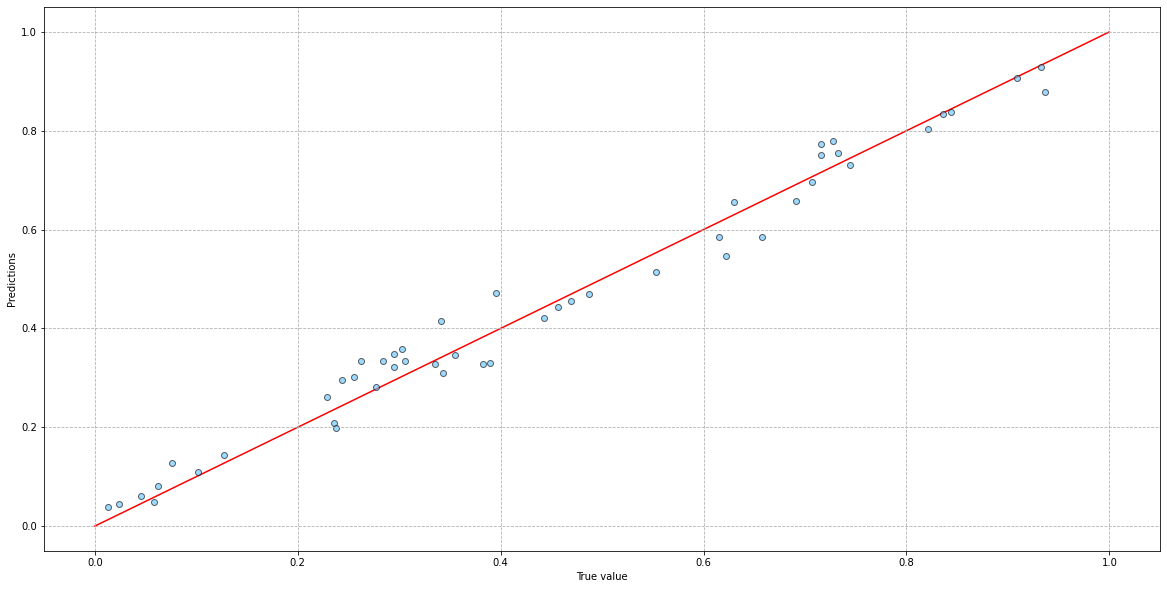

R2 Score: 0.978213337
Explained Variance Score: 0.978572306
MSE: 0.001527975
MAE: 0.032495035


In [13]:
random_forest_model = RandomForestRegressor(
    n_estimators=2000,
    max_depth=20,
    random_state=7
).fit(X_train, y_train)
y_pred = random_forest_model.predict(X_val)
print(f'Model: {random_forest_model}')
print(f'Predictions: {y_pred.shape}')

#plot
plot_preds(y_pred, y_val)
r2, ev, mse, mae = calc_metrics(y_pred, y_val)
print(f'R2 Score: {r2:.9f}')
print(f'Explained Variance Score: {ev:.9f}')
print(f'MSE: {mse:.9f}')
print(f'MAE: {mae:.9f}')
# Update overall results, if we haven't already:
if 'RandomForestModel' not in experiments:
    experiments.extend(['RandomForestModel']*4)
    metric_names.extend(['R2', 'Explained Variance', 'MSE', 'MAE'])
    metric_vals.extend([r2, ev, mse, mae])

# Optimizing Multilayer Perceptron (MLP) hyperparameter

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
Model: MLPRegressor(batch_size=32, hidden_layer_sizes=(10, 10, 10, 10, 10, 10),
             random_state=0, solver='lbfgs')
Predictions: (49,)


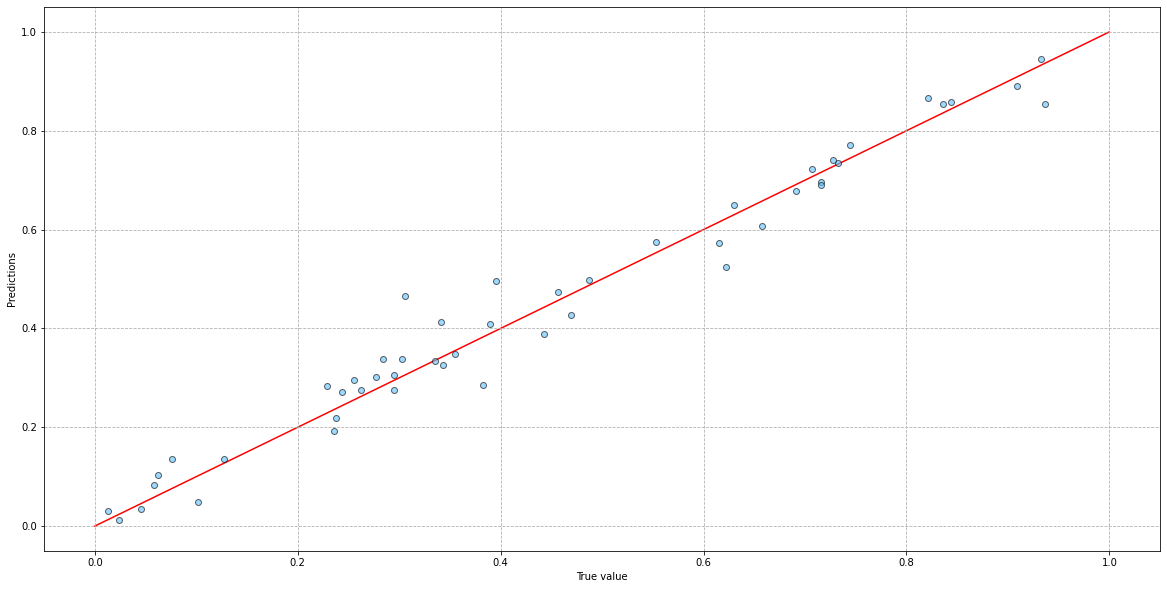

R2 Score: 0.969111514
Explained Variance Score: 0.969484784
MSE: 0.002166317
MAE: 0.034909054


In [14]:
# optimizing MLP hyperparameter
nn = MLPRegressor(
    hidden_layer_sizes=(10,10,10,10,10,10), 
    batch_size=32,
    activation='relu',
    solver='lbfgs', #lbfgs, sgd, adam
    random_state=0,
).fit(X_train, y_train)
y_pred = nn.predict(X_val)
print(f'Model: {nn}')
print(f'Predictions: {y_pred.shape}')

# plot
plot_preds(y_pred, y_val)
r2, ev, mse, mae = calc_metrics(y_pred, y_val)
print(f'R2 Score: {r2:.9f}')
print(f'Explained Variance Score: {ev:.9f}')
print(f'MSE: {mse:.9f}')
print(f'MAE: {mae:.9f}')
# Update overall results, if we haven't already:
if 'AdvancedNN' not in experiments:
    experiments.extend(['AdvancedNN']*4)
    metric_names.extend(['R2', 'Explained Variance', 'MSE', 'MAE'])
    metric_vals.extend([r2, ev, mse, mae])

# Comparing models

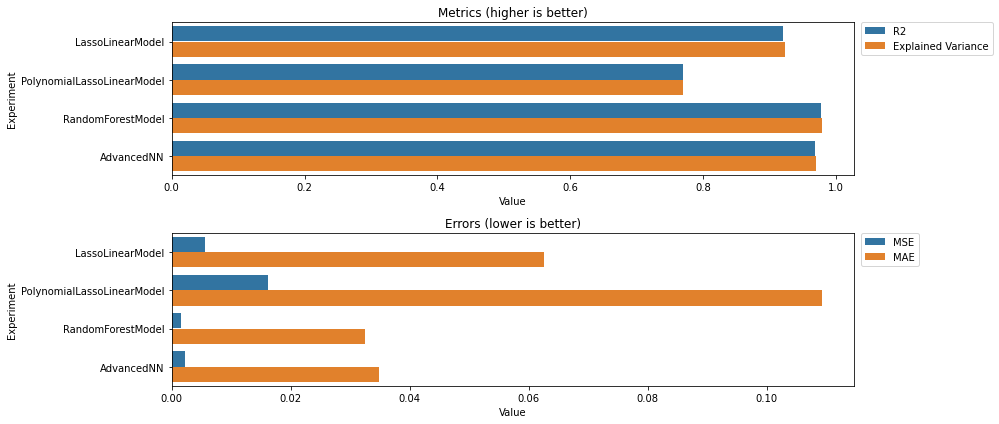

                    Experiment              Metric     Value
0             LassoLinearModel                  R2  0.920030
1             LassoLinearModel  Explained Variance  0.923011
2             LassoLinearModel                 MSE  0.005609
3             LassoLinearModel                 MAE  0.062583
4   PolynomialLassoLinearModel                  R2  0.770270
5   PolynomialLassoLinearModel  Explained Variance  0.770272
6   PolynomialLassoLinearModel                 MSE  0.016112
7   PolynomialLassoLinearModel                 MAE  0.109231
8            RandomForestModel                  R2  0.978213
9            RandomForestModel  Explained Variance  0.978572
10           RandomForestModel                 MSE  0.001528
11           RandomForestModel                 MAE  0.032495
12                  AdvancedNN                  R2  0.969112
13                  AdvancedNN  Explained Variance  0.969485
14                  AdvancedNN                 MSE  0.002166
15                  Adva

In [15]:
# comparing models
df_res = pd.DataFrame()
df_res['Experiment'] = experiments
df_res['Metric'] = metric_names
df_res['Value'] = metric_vals
#df_res.head()

# barplot metrics and errors
fig, axes = plt.subplots(2, 1, figsize=(14, 6))
sns.barplot(
    data=df_res[df_res.Metric.isin(['R2', 'Explained Variance'])],
    orient='h',
    x='Value',
    y='Experiment',
    hue='Metric',
    ax=axes[0]
)
axes[0].set_title('Metrics (higher is better)')
axes[0].legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
sns.barplot(
    data=df_res[~df_res.Metric.isin(['R2', 'Explained Variance'])],
    orient='h',
    x='Value',
    y='Experiment',
    hue='Metric',
    ax=axes[1],
)
axes[1].set_title('Errors (lower is better)')
axes[1].legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

print(df_res)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9fa1dc93-89c0-49df-a5a0-1b6182352f09' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>